In [1]:
! git clone https://github.com/data-psl/lectures2020
import sys
sys.path.append('lectures2020/notebooks/02_sklearn')
%cd 'lectures2020/notebooks/02_sklearn'

fatal: destination path 'lectures2020' already exists and is not an empty directory.
/home/amensch/work/teaching/dauphine/lectures2020/notebooks/02_sklearn/lectures2020/notebooks/02_sklearn


In this notebook we define a Pipeline estimator that first apply a `PCA` and then classify the reduced representation using a `LogisticRegression`.

We will use the `Pipeline` object and the `GridSearchCV` object, as well as a little `pandas` in the end

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Now that you have all useful objects in hand, define a pipeline that first apply a PCA transform and then apply a LogisticRegression.
You may look at `Pipeline` documentation of scikit-learn

In [13]:
# %load "solutions/06-Pipeline-1.py"

ValueError: 'solutions/06-Pipeline-1.py' was not found in history, as a file, url, nor in the user namespace.

The elements of the Pipeline are named and accessed using `estimator.get_params()`, and may be modified using `estimator.set_params()`

In [4]:
pipe.get_params()

{'memory': None,
 'steps': [('pca',
   PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
       svd_solver='auto', tol=0.0, whiten=False)),
  ('logistic',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=10000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                    w

In [ ]:
pipe.set_params(pca__n_components=10)

## Performing a grid-search on multiple parameters

We want to test what reduction we should use in the `PCA`, along with what regularization in the `LogisticRegression`

How do we do that ? We use a `GridSearchCV` with multiple parameters

In [ ]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [ ]:
search

In [ ]:
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

Let's see how how the explained signal vary with the PCA size


In [ ]:
fig, ax0 = plt.subplots(nrows=1, figsize=(6, 6))


ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=4)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12), loc='upper center')

ax0.set_xlabel('n_components')


### Exploring grid-search

To explore the grid search results, we may transform the attribute `cv_results_` in a DataFrame.

**Question**: how many results should appear ?

In [ ]:
search.cv_results_

In [ ]:
results = pd.DataFrame(search.cv_results_)
results

Let's index these results by the hyper-parameters

In [ ]:
results = results.set_index(['param_pca__n_components','param_logistic__C']).sort_index()
results

In [ ]:
# Take the best C for each `n_components`
best_clfs = results.reset_index().groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [ ]:
best_clfs

In [ ]:
fig, ax1 = plt.subplots(nrows=1, figsize=(6, 6))

best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.1, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Performing a grid-search on multiple parameters

We want to test what reduction we should use in the `PCA`, along with what regularization in the `LogisticRegression`

How do we do that ? We use a `GridSearchCV` with multiple parameters

In [6]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [7]:
search

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=10, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
    

In [8]:
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Let's see how how the explained signal vary with the PCA size


Text(0.5, 0, 'n_components')

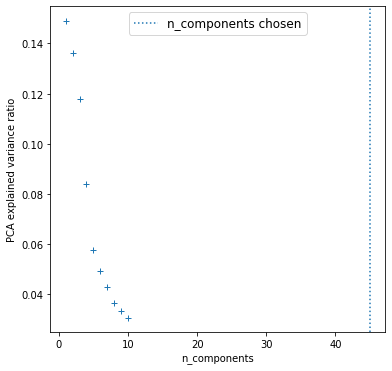

In [9]:
fig, ax0 = plt.subplots(nrows=1, figsize=(6, 6))


ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=4)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12), loc='upper center')

ax0.set_xlabel('n_components')


### Exploring grid-search

To explore the grid search results, we may transform the attribute `cv_results_` in a DataFrame.

**Question**: how many results should appear ?

In [10]:
search.cv_results_

{'mean_fit_time': array([0.10226703, 0.09395771, 0.08851624, 0.11030211, 0.09651237,
        0.50829949, 0.24711747, 0.20019112, 0.22005386, 0.22867527,
        1.43818502, 1.53342023, 0.10179582, 0.08561602, 0.07442994,
        0.9636703 , 1.31579556, 0.05186472, 0.05969257, 0.05058556]),
 'std_fit_time': array([0.02025132, 0.02698769, 0.01124451, 0.0122175 , 0.01415143,
        0.08881701, 0.02701491, 0.02042788, 0.03258908, 0.01465111,
        0.3239303 , 0.44359254, 0.0181554 , 0.00885587, 0.00937938,
        0.37390013, 0.21796197, 0.00173781, 0.00222358, 0.00313282]),
 'mean_score_time': array([0.00107546, 0.00080905, 0.00107903, 0.00093193, 0.00101109,
        0.00067649, 0.00072765, 0.00084491, 0.00093641, 0.00106506,
        0.00079231, 0.00086322, 0.00077515, 0.00081072, 0.00098457,
        0.00084991, 0.00051222, 0.00083699, 0.00083437, 0.00140448]),
 'std_score_time': array([5.49682861e-04, 1.75189128e-04, 2.70898966e-04, 5.40455321e-05,
        2.22362741e-04, 2.13005886e-

In [11]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102267,0.020251,0.001075,0.000550,0.0001,5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",0.780556,0.758333,0.802228,0.805014,0.746518,0.778530,0.023237,20
1,0.093958,0.026988,0.000809,0.000175,0.0001,15,"{'logistic__C': 0.0001, 'pca__n_components': 15}",0.897222,0.858333,0.896936,0.938719,0.849582,0.888158,0.031916,14
2,0.088516,0.011245,0.001079,0.000271,0.0001,30,"{'logistic__C': 0.0001, 'pca__n_components': 30}",0.905556,0.880556,0.910864,0.944290,0.857939,0.899841,0.029181,10
3,0.110302,0.012217,0.000932,0.000054,0.0001,45,"{'logistic__C': 0.0001, 'pca__n_components': 45}",0.905556,0.877778,0.908078,0.944290,0.863510,0.899842,0.027867,9
4,0.096512,0.014151,0.001011,0.000222,0.0001,64,"{'logistic__C': 0.0001, 'pca__n_components': 64}",0.905556,0.880556,0.908078,0.944290,0.863510,0.900398,0.027446,8
5,0.508299,0.088817,0.000676,0.000021,0.0464159,5,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.838889,0.750000,0.844011,0.869081,0.818942,0.824184,0.040388,17
6,0.247117,0.027015,0.000728,0.000050,0.0464159,15,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.930556,0.852778,0.927577,0.924791,0.888579,0.904856,0.030170,6
7,0.200191,0.020428,0.000845,0.000034,0.0464159,30,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.872222,0.933148,0.961003,0.899721,0.917663,0.030085,3
8,0.220054,0.032589,0.000936,0.000019,0.0464159,45,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.941504,0.955432,0.902507,0.919889,0.028544,1
9,0.228675,0.014651,0.001065,0.000294,0.0464159,64,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.938719,0.955432,0.905292,0.919889,0.027828,1


Let's index these results by the hyper-parameters

In [ ]:
results = results.set_index(['param_pca__n_components','param_logistic__C']).sort_index()
results

In [ ]:
# Take the best C for each `n_components`
best_clfs = results.reset_index().groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [ ]:
best_clfs

In [ ]:
fig, ax1 = plt.subplots(nrows=1, figsize=(6, 6))

best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()